In [19]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [20]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1
        print(counter)
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

def lot_short_cash_neutral(price_long, price_short, lot_long):
    return roundup((price_long*lot_long)/price_short)

def roundup(value):
    #return int(math.ceil(value / 100.0)) * 100
    ret = int(round(value, -2))
    if (ret <= 0):
        return 100
    return ret

def parameters_input_cash_neutral(pairs, data, lot=100):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        signalStr = row['SignalStr'].split('/')

        y_price = data[y_symbol][0]
        x_price = data[x_symbol][0]

        y_lot = 0
        x_lot = 0
        if (signalStr[0]=='Long'):
            x_lot = lot_short_cash_neutral(y_price, x_price, lot)
            y_lot = lot
        else:
            y_lot = lot_short_cash_neutral(x_price, y_price, lot)
            x_lot = lot

        print('{}: {} ({}) {} <-> {}: {} ({}) {}'.format(\
            signalStr[0], y_symbol, round(y_price, 2), y_lot, signalStr[1], x_symbol, round(x_price, 2), x_lot))
        
def check_coint(pairs, data):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
        print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

In [21]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [22]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-09-30
data: (354, 74)
pairs: (2334, 12)


In [23]:
#data.to_excel('datasets/data_cart.xlsx')

In [24]:
#pairs

In [25]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 10) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,CSNA3,USIM5,-4.433720,99,0.952237,2.279501,2,Short/Long,0.672984,9,"100,120,140,160,180,200,220,240,250"
1,100,VIVT4,VVAR3,-4.965258,99,0.794330,2.168591,2,Long/Short,0.324737,9,"100,120,140,160,180,200,220,240,250"
2,100,BBSE3,SANB11,-3.925078,99,0.665305,2.402296,3,Long/Short,0.597295,9,"100,120,140,160,180,200,220,240,250"
3,100,BBSE3,YDUQ3,-3.609312,99,0.363448,2.267306,3,Long/Short,0.572089,9,"100,120,140,160,180,200,220,240,250"
4,100,EGIE3,EMBR3,-3.525522,99,1.347709,2.302753,3,Long/Short,0.326472,9,"100,120,140,160,180,200,220,240,250"
5,100,EGIE3,HYPE3,-3.875194,99,0.608898,2.131781,3,Long/Short,0.474446,9,"100,120,140,160,180,200,220,240,250"
6,100,EGIE3,YDUQ3,-3.613231,99,0.336839,2.441262,3,Long/Short,0.346834,9,"100,120,140,160,180,200,220,240,250"
7,100,EMBR3,IRBR3,-3.829915,99,0.473230,2.296476,3,Long/Short,0.291198,9,"100,120,140,160,180,200,220,240,250"
8,100,EQTL3,ITSA4,-4.048430,99,2.365914,2.149080,3,Long/Short,0.535834,9,"100,120,140,160,180,200,220,240,250"
9,100,GNDI3,GOAU4,-3.559304,99,5.351747,2.032192,3,Long/Short,0.195082,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

0


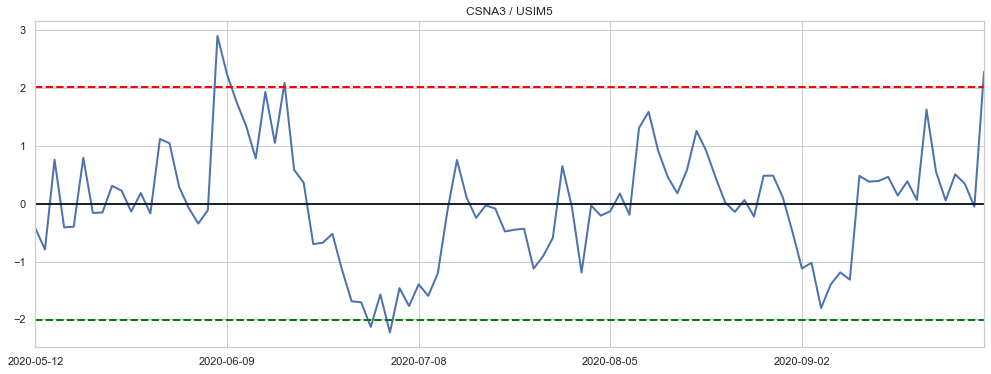

1


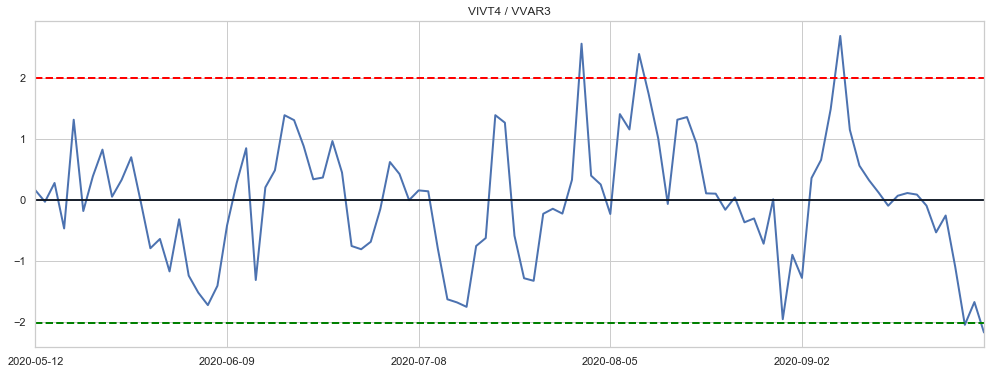

2


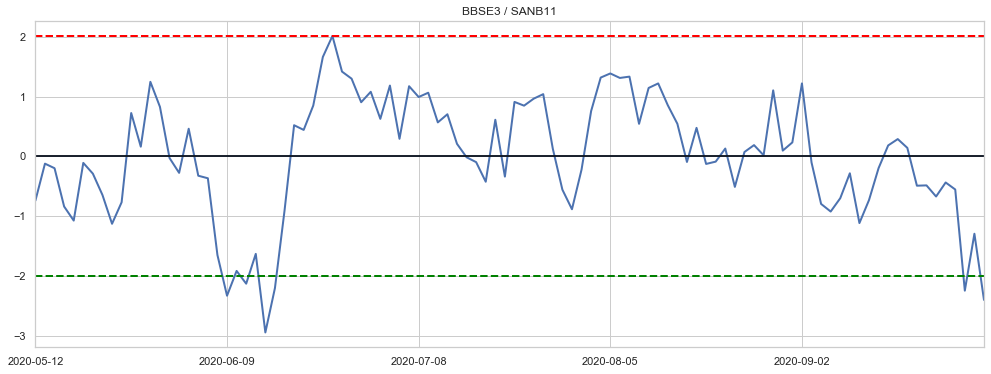

3


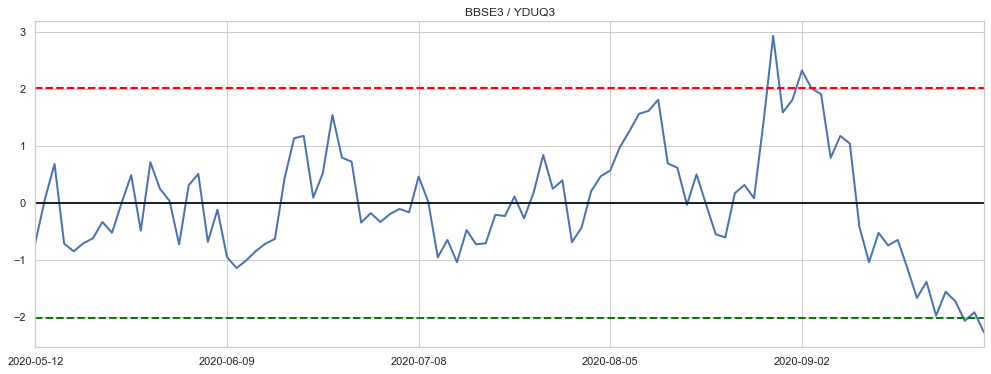

4


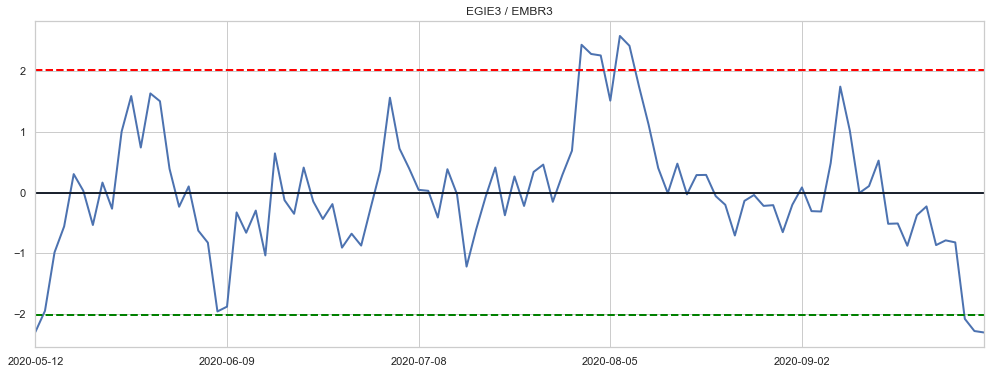

5


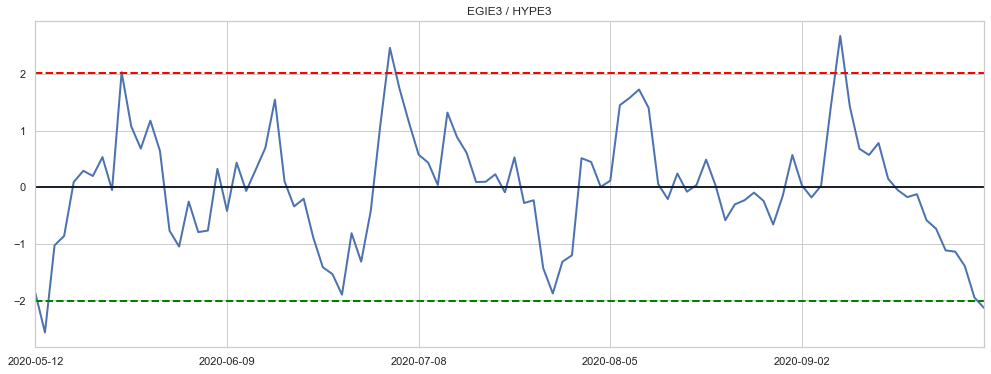

6


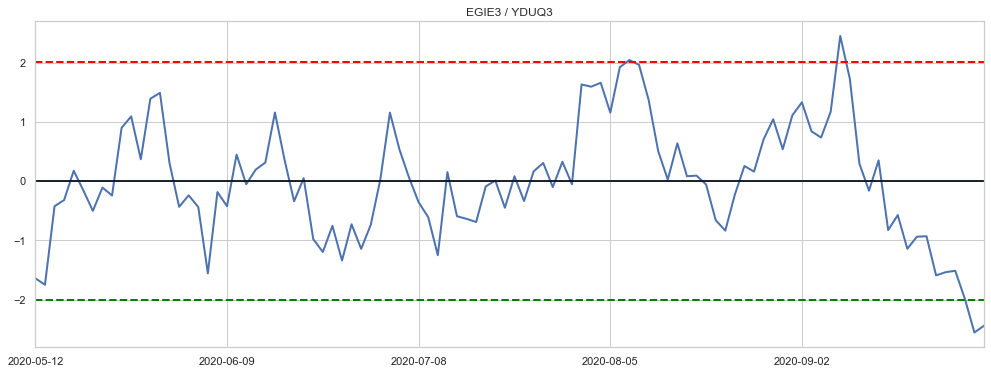

7


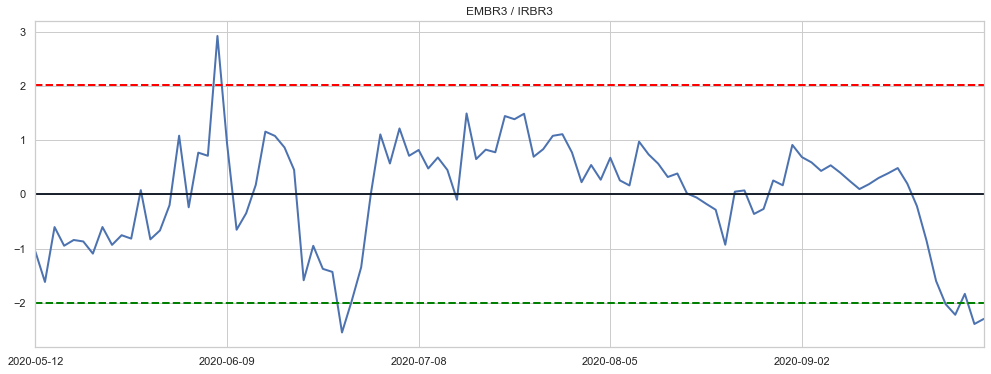

8


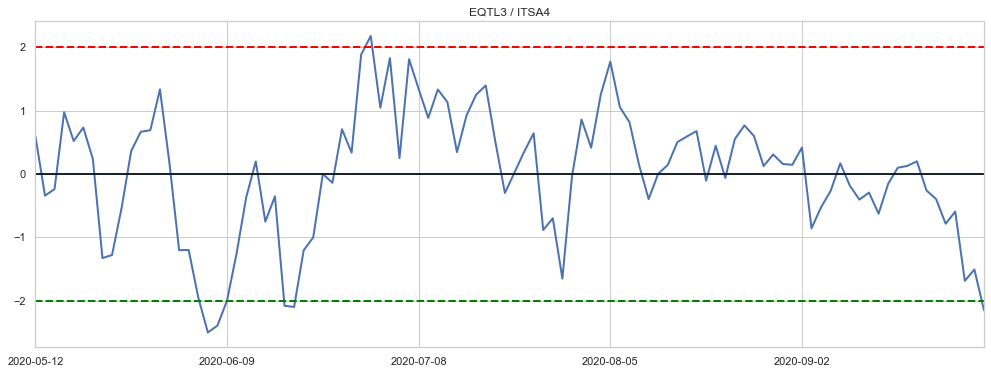

9


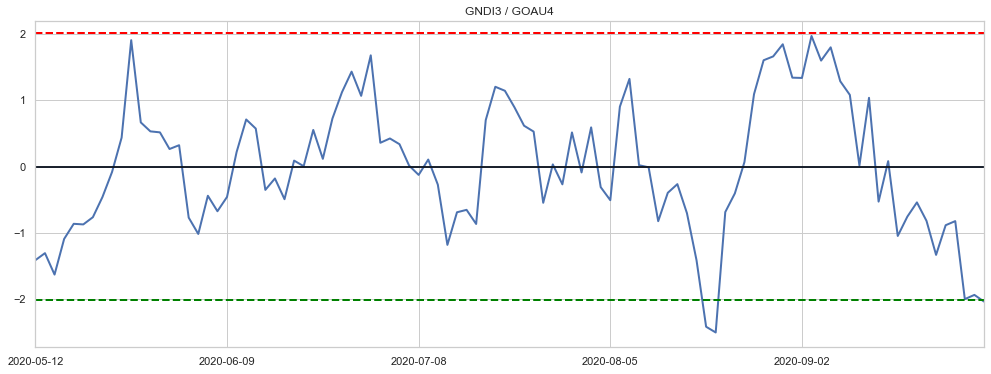

10


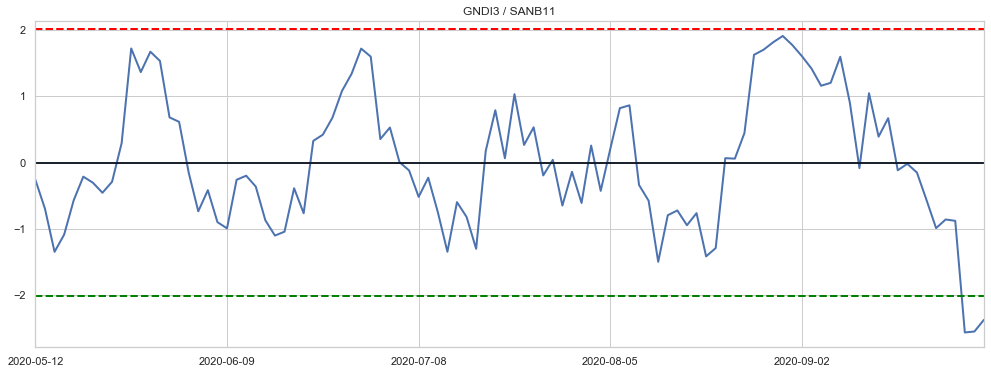

11


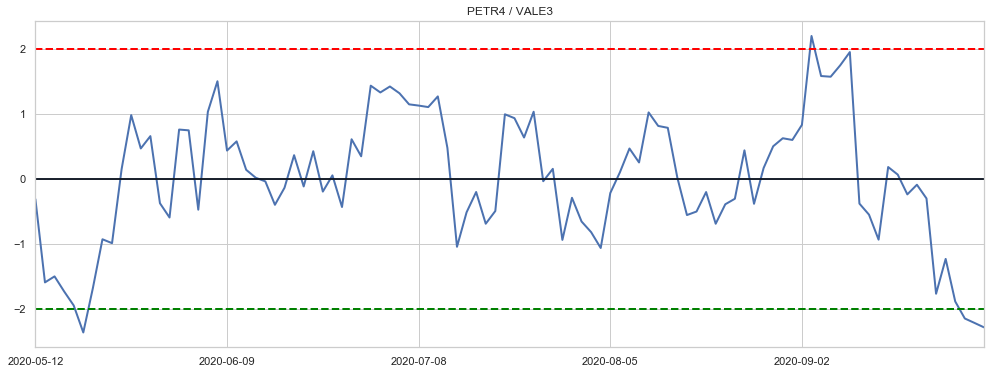

12


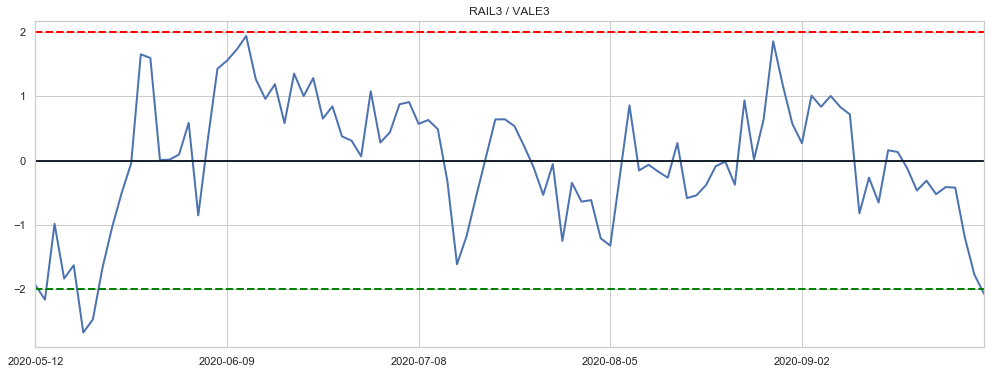

13


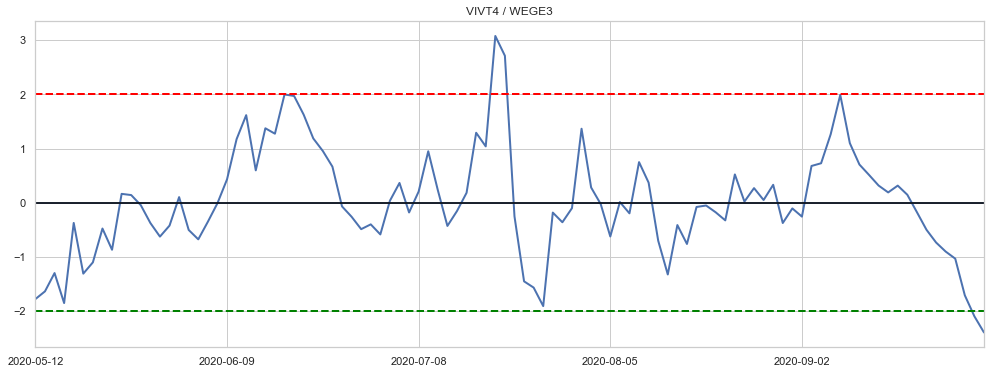

In [37]:
plot_pairs(pairs_signal, data)
#mult.plot_residue(mult.residue(data['HAPV3'], data['IRBR3'], 100))

In [27]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [28]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [29]:
#new pairs 1,3,9, 8
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,PETR3,VALE3,-4.369692,99,0.416766,2.123380,2,Long/Short,0.541212,9,"100,120,140,160,180,200,220,240,250"
1,100,HAPV3,UGPA3,-3.537270,99,1.559066,2.223834,3,Long/Short,0.334639,9,"100,120,140,160,180,200,220,240,250"


In [30]:
"""new = pairs_signal.iloc[[1,3,8,9]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"new = pairs_signal.iloc[[1,3,8,9]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [31]:
#oper.to_csv('datasets/operations.csv', index=False)

In [32]:
check_coint(oper, data)

PETR3/VALE3, 100, True, 99
HAPV3/UGPA3, 100, False, 0


0


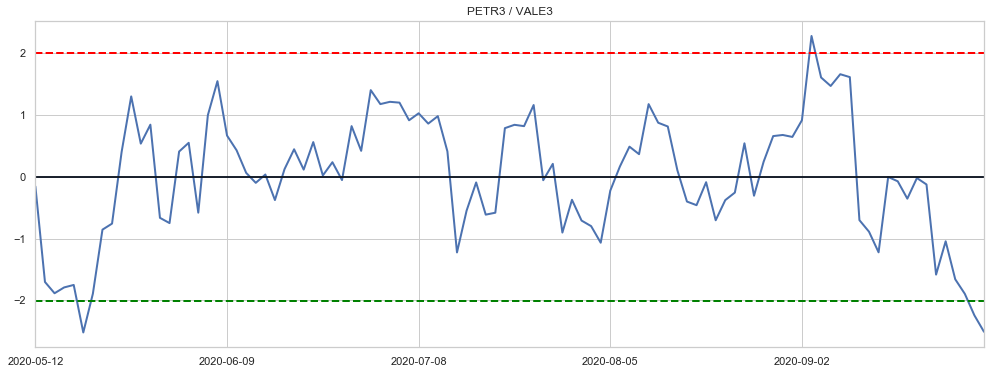

1


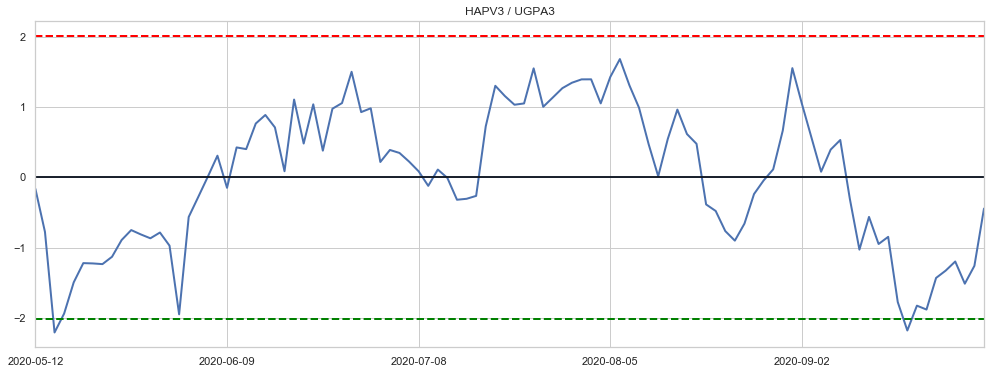

In [33]:
plot_pairs(oper, data)

In [34]:
#df.to_excel('datasets/data_cart.xlsx')

In [35]:
parameters_input_cash_neutral(oper, data)

Long: PETR3 (19.77) 100 <-> Short: VALE3 (59.11) 100
Long: HAPV3 (62.14) 100 <-> Short: UGPA3 (19.27) 300


In [36]:
"""

"""

'\n\n'